## ABOUT THE FASHION_MNIST DATASET:

The Fashion-MNIST is a dataset of Zalando's article images. The Fashion-MNIST dataset is a popular dataset used for benchmarking machine learning models, particularly in computer vision. It is designed as a drop-in replacement for the original MNIST dataset but contains images of clothing items instead of handwritten digits.

#### **Overview of the Fashion-MNIST Dataset:**
- **Size:** 70,000 grayscale images  
- **Training set:** 60,000 images  
- **Test set:** 10,000 images  
- **Image dimensions:** 28x28 pixels  
- **Number of classes:** 10 (each representing a type of clothing)  

#### **Classes (Labels) in Fashion-MNIST**
Each image belongs to one of the following 10 classes:

| Label | Class Name     |
|-------|--------------|
| 0     | T-shirt/top  |
| 1     | Trouser      |
| 2     | Pullover     |
| 3     | Dress        |
| 4     | Coat         |
| 5     | Sandal       |
| 6     | Shirt        |
| 7     | Sneaker      |
| 8     | Bag          |
| 9     | Ankle boot   |

#### **Key Features:**
- The dataset is more challenging than MNIST because the images have more complex patterns.  
- It is intended to be used as a benchmark for machine learning and deep learning models.  
- Each pixel in the images has values ranging from **0 to 255** (grayscale intensity).  
- Unlike color images (RGB), these images have only **one channel**.  
- The images are already preprocessed, so they are in **NumPy array format**.  


In [1]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

import tensorflow as tf
tf.random.set_seed(0)

from tensorflow.keras import datasets, layers, models

## IMPORTING FASHION_MNIST DATASET:

In [2]:
data = datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = data.load_data()

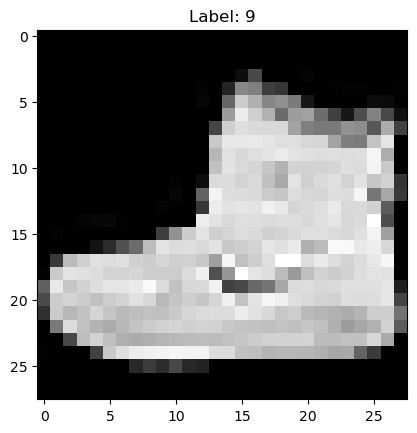

In [3]:
# Display a sample image
plt.imshow(train_img[0], cmap='gray')    # Displaying image in grayscale format(cmap='gray') 
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [4]:
print('The type of training data and training label is: ', type(train_img), '& ',type(train_labels), '\nTotal images in training data: ', len(train_img))

The type of training data and training label is:  <class 'numpy.ndarray'> &  <class 'numpy.ndarray'> 
Total images in training data:  60000


In [5]:
print('The type of testing data and testing label is: ', type(test_img), '& ',type(test_labels), '\nTotal images in testing data: ', len(test_img))

The type of testing data and testing label is:  <class 'numpy.ndarray'> &  <class 'numpy.ndarray'> 
Total images in testing data:  10000


In [6]:
print('The shape of an image in the trating data: ', train_img[0].shape, '\nThis shows that images are in Grayscale, as there are 0 channels.')

The shape of an image in the trating data:  (28, 28) 
This shows that images are in Grayscale, as there are 0 channels.


## NORMALIZING THE PIXEL VALUE TO BE IN A RANGE OF 0 to 1:

In [7]:
train_data, test_data = train_img/255, test_img/255

## RESHAPING THE IMAGES AS (28, 28, 1):
Since CNNs expect a 3D input per image, we must reshape (28,28) → (28,28,1) so the model knows it's a grayscale image. Otherwise, it may misinterpret the data shape and cause errors.

In [8]:
train_data = train_data.reshape(-1, 28, 28, 1)
test_data = test_data.reshape(-1, 28, 28, 1)

In [9]:
print('The shape of training and testing data: ', train_data.shape, 'and ', test_data.shape)

The shape of training and testing data:  (60000, 28, 28, 1) and  (10000, 28, 28, 1)


## BUILDING CONVOLUTION NEURAL NETWORK(CNN):

In [10]:
model = models.Sequential()                             # Creating an object of the Sequential class

In [11]:
# This section of code builds the convolutional base of a Convolutional Neural Network (CNN)

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

C:\Users\HARSH\OneDrive\Documents\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---
#### Conv2D and MaxPooling2D in CNNs  

Conv2D and MaxPooling2D in CNNs are two functions that are fundamental building blocks in **Convolutional Neural Networks (CNNs)** used for image processing tasks like **classification, object detection, and segmentation**.  

---

#### 1. Conv2D (Convolutional Layer)  
🔹 **Purpose:** Extracts spatial features (edges, textures, patterns) from an image.  
🔹 **How it works:** Applies multiple filters (kernels) to an input image and computes feature maps.  

**Syntax**  
```python
tf.keras.layers.Conv2D(filters, kernel_size, strides=(1,1), padding='valid', activation=None)
```
#### Main Parameters  
- **`filters`** → Number of filters (output feature maps).  
- **`kernel_size`** → Size of the filter (e.g., `(3,3)` for a **3×3 kernel**).  
- **`strides`** → Step size for moving the filter (**default: (1,1)**).  
- **`padding`**:  
  - `'valid'` → No padding, **reduces image size**.  
  - `'same'` → Adds padding, **keeps same size**.  
- **`activation`** → Activation function (**ReLU is commonly used**).  

---

#### 2. MaxPooling2D (Pooling Layer)  
🔹 **Purpose:** Reduces the spatial dimensions (**width & height**) while keeping the most important features.  
🔹 **How it works:** Extracts the maximum value from each region (**pool size**) in the feature map.  

**Syntax**  
```python
tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=None, padding='valid')
```
#### Main Parameters  
- **`pool_size`** → Size of the pooling window (e.g., `(2,2)` reduces the size by half).  
- **`strides`** → Step size (**default is same as `pool_size`**).  
- **`padding`**:  
  - `'valid'` → No padding.  
  - `'same'` → Keeps some border pixels.  

In [12]:
# Fully connected dense layer:

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'linear'))  # Activation: linear (default) → Outputs raw logits (unnormalized scores) instead of probabilities.

In [13]:
# Compiling the model:

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),  # This is true cause model's o/p is logist, it would be false if
                                                                                        # the o/p is probability as in the case of softmax.
             metrics = ['accuracy'])

## MODEL TRAINING:

In [14]:
history = model.fit(train_data, train_labels, epochs = 5, validation_data = (test_data, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.7420 - loss: 0.7129 - val_accuracy: 0.8667 - val_loss: 0.3699
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8779 - loss: 0.3376 - val_accuracy: 0.8854 - val_loss: 0.3242
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8968 - loss: 0.2831 - val_accuracy: 0.8910 - val_loss: 0.3079
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9081 - loss: 0.2490 - val_accuracy: 0.8886 - val_loss: 0.3117
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9195 - loss: 0.2214 - val_accuracy: 0.8979 - val_loss: 0.2873


#### Using Test Data as Validation Data in `model.fit()`

In `model.fit()`, we typically use a **portion of the training data** for validation. However, in this case, we are using the **test data** as validation data, which has some implications.

##### **Validation Data vs. Test Data**
- **Validation Data**: Used during training to **tune hyperparameters** and monitor **overfitting**.
- **Test Data**: Used **after training is complete** to evaluate the model's final performance.

---

##### **How It Works in This Case**
1. **The model evaluates test data after every epoch.**  
   - After each round of training, it checks how well it's doing on the test set.  

2. **The model does not learn from test data.**  
   - The weights are **not updated** based on test data.  
   - It is only used to compute `val_loss` and `val_accuracy`.  

---

##### **Potential Issues**
- Normally, the **test set** should be used **only after training** is complete.  
- Using test data for validation means it gets **indirectly "seen"** during training.  
- This can lead to **data leakage**, making test results **over-optimistic**.  

---

##### **Better Approach: Separate Train, Validation, and Test Sets**
A better way is to split data into:
- **Training Set** → For learning.  
- **Validation Set** → For tuning (e.g., 20% of training data).  
- **Test Set** → For final evaluation.  

---

**But here we are using test data as a validation set, just to show that this can be done too.**  


## EVALUATION OF THE MODEL:

In [15]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose = 2)  # verbose=2: Controls the display of progress logs: 0: No output, 1: Shows a 
                                                                           # progress bar, 2: Prints one line per epoch with loss and accuracy.
print('\nTest Accuracy: ', test_acc*100, '%')

313/313 - 2s - 7ms/step - accuracy: 0.8979 - loss: 0.2873

Test Accuracy:  89.78999853134155 %


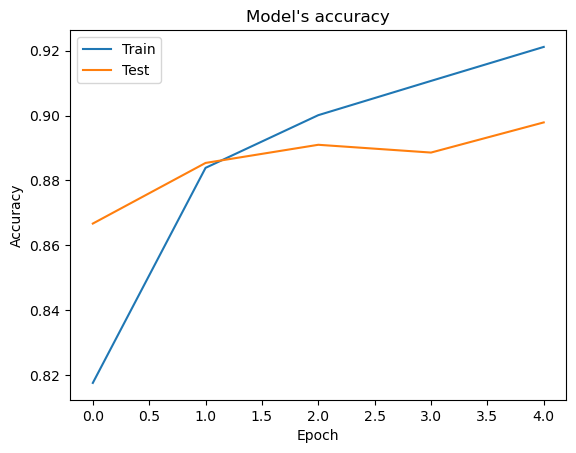

In [16]:
# Plotting model's training & validation accuracy:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])     # Here our training accuracy is the validation accuracy as test data is validation set 
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model\'s accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')

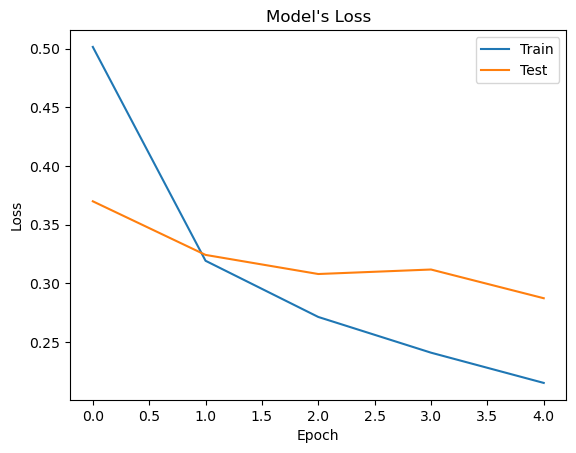

In [17]:
# Plotting model's training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model\'s Loss')
plt.legend(['Train', 'Test'], loc = 'upper right')